<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#962626;
             background-color:#962626;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Heart Disease  Prediction🫀 </h1>
</div>


<center>
    <a>
        <img src="https://www.emergencyphysicians.org/siteassets/emphysicians/all-images/kwtg/heart-attack.jpg"
             border="0" 
             width=800 
             height=600 
             class="center">
    </a>


**problem statement**

<a id="table"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color:#b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Table Of Content </h1>
</div>

<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title></title>
    </head>
<body>

<ol>
    <li><a href="#8">Dataset Exploring</a></li>
    <li><a href="#1">Cleaning</a></li>
    <li><a href="#2">EDA and Visualizing</a></li>
    <li><a href="#4">Preprocessing Pipelines</a></li>
    <li><a href="#5">Sampling</a></li>
    <li><a href="#6">Modeling</a></li>
    <li><a href="#7">Hyperparameter Tuning</a></li>
</ol>

</body>
</html>


<a id="8"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Exploring Dataset </h1>
</div>

In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/merged-dataset/merged_data.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
import seaborn as sns    
import matplotlib.pyplot as plt 

import missingno as msno 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# general style
sns.set_style("darkgrid")
sns.set_palette("RdYlBu")

In [3]:
df = pd.read_csv("/kaggle/input/merged-dataset/merged_data.csv")
df.head()

Sex  GenHealth  PhysicalHealth  MentalHealth PhysicalActivity  \
0  Female  Very good             0.0           0.0               No   
1  Female  Very good             0.0           0.0               No   
2  Female  Excellent             0.0           0.0               No   
3  Female  Very good             2.0           3.0              Yes   
4  Female  Excellent             0.0           0.0              Yes   

   SleepTime Stroke Asthma SkinCancer Diabetic    BMI AlcoholDrinking  \
0        8.0     No     No         No      Yes    NaN              No   
1        8.0     No     No         No      Yes    NaN              No   
2        6.0     No     No        Yes       No  26.57              No   
3        5.0     No     No        Yes       No  25.61              No   
4        7.0     No    Yes         No       No  23.30              No   

                       Race      AgeCategory HeartDisease KidneyDisease  \
0  White only, Non-Hispanic  Age 80 or older           No            No   
1  White only, Non-Hispanic  Age 80 or older           No            No   
2  White only, Non-Hispanic  Age 80 or older           No            No   
3  White only, Non-Hispanic     Age 55 to 59           No            No   
4  White only, Non-Hispanic              NaN           No            No   

                                 Smoking DiffWalking  
0                           Never smoked          No  
1                           Never smoked          No  
2                           Never smoked          No  
3                           Never smoked          No  
4  Current smoker - now smokes some days          No

In [4]:
df.shape

(764927, 18)

In [5]:
df.columns

Index(['Sex', 'GenHealth', 'PhysicalHealth', 'MentalHealth',
       'PhysicalActivity', 'SleepTime', 'Stroke', 'Asthma', 'SkinCancer',
       'Diabetic', 'BMI', 'AlcoholDrinking', 'Race', 'AgeCategory',
       'HeartDisease', 'KidneyDisease', 'Smoking', 'DiffWalking'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764927 entries, 0 to 764926
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               764927 non-null  object 
 1   GenHealth         763729 non-null  object 
 2   PhysicalHealth    754000 non-null  float64
 3   MentalHealth      755860 non-null  float64
 4   PhysicalActivity  763834 non-null  object 
 5   SleepTime         759474 non-null  float64
 6   Stroke            763370 non-null  object 
 7   Asthma            763154 non-null  object 
 8   SkinCancer        761784 non-null  object 
 9   Diabetic          763840 non-null  object 
 10  BMI               716121 non-null  float64
 11  AlcoholDrinking   718353 non-null  object 
 12  Race              750870 non-null  object 
 13  AgeCategory       755848 non-null  object 
 14  HeartDisease      761862 non-null  object 
 15  KidneyDisease     763001 non-null  object 
 16  Smoking           72

<a id="1"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Dataset Cleaning </h1>
</div>

In [7]:
nans = df.isna().sum().sort_values(ascending = False)
pct = (nans/df.shape[0]) * 100
pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaNValuesCount', 1 : 'NaNValuesPercentage%'}).round(2)

NaNValuesCount  NaNValuesPercentage%
BMI                        48806                  6.38
AlcoholDrinking            46574                  6.09
Smoking                    35462                  4.64
DiffWalking                24012                  3.14
Race                       14057                  1.84
PhysicalHealth             10927                  1.43
AgeCategory                 9079                  1.19
MentalHealth                9067                  1.19
SleepTime                   5453                  0.71
SkinCancer                  3143                  0.41
HeartDisease                3065                  0.40
KidneyDisease               1926                  0.25
Asthma                      1773                  0.23
Stroke                      1557                  0.20
GenHealth                   1198                  0.16
PhysicalActivity            1093                  0.14
Diabetic                    1087                  0.14
Sex                            0                  0.00

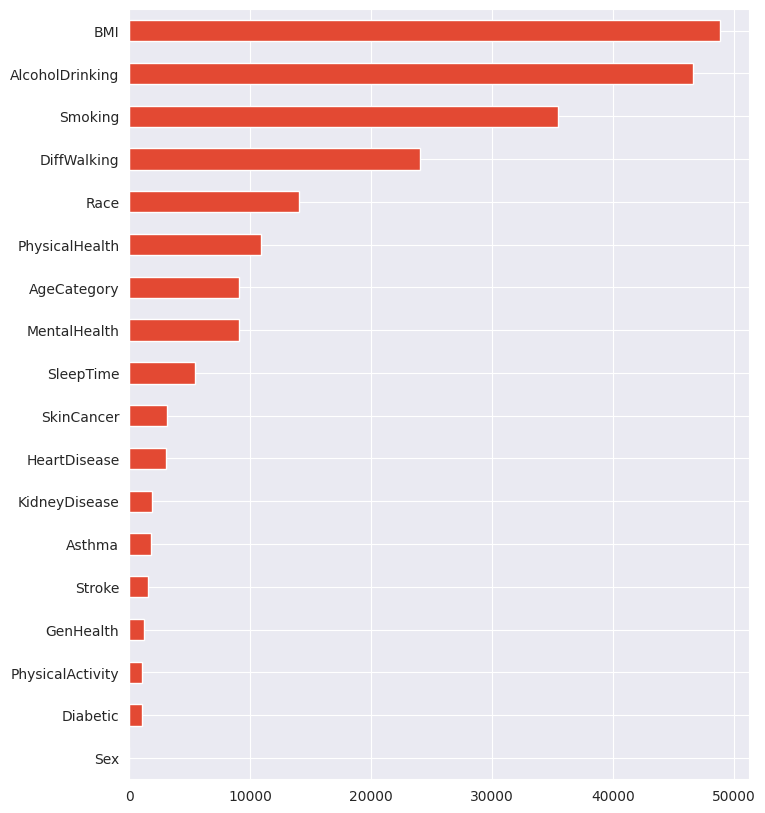

In [8]:
# Set the size
plt.figure(figsize=(8, 10))

df.isna().sum().sort_values().plot(kind='barh')
plt.show()

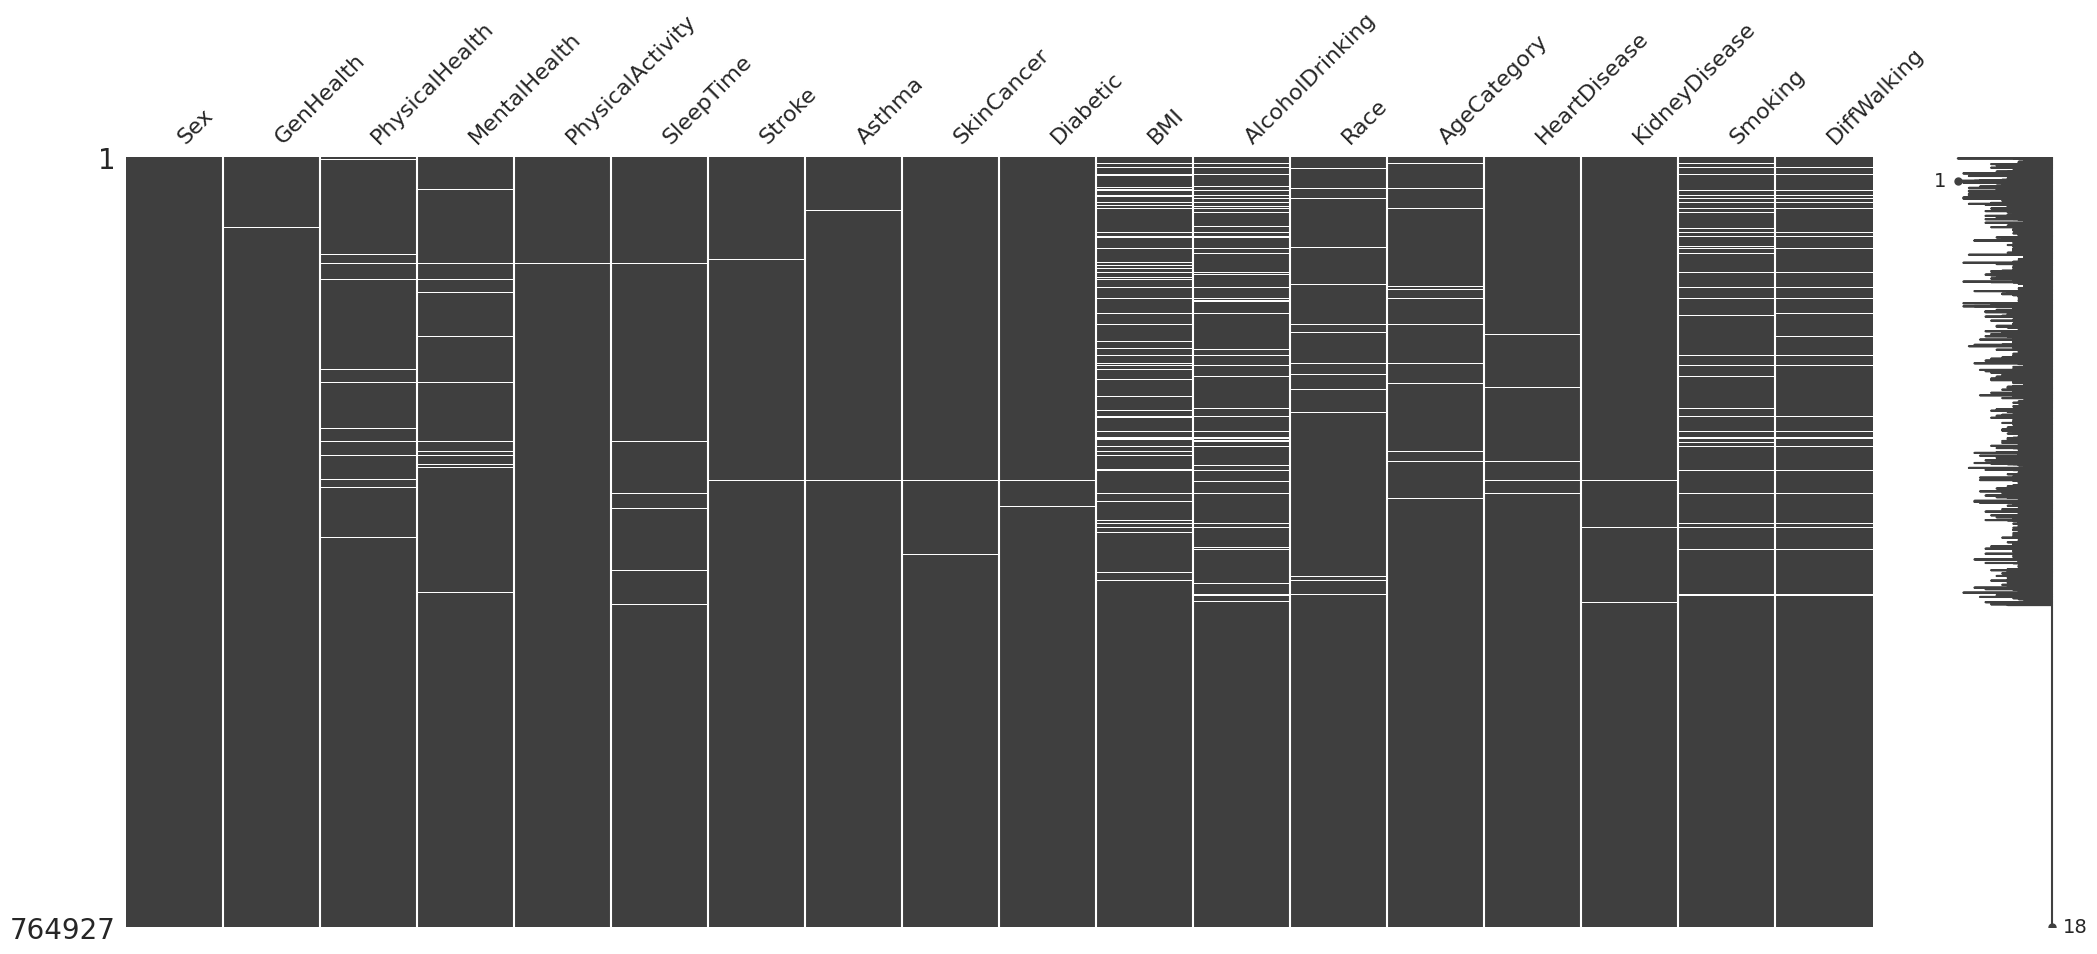

In [9]:
#viz missing
msno.matrix(df)
plt.show()

In [10]:
df = df.dropna()
df.isna().sum()

Sex                 0
GenHealth           0
PhysicalHealth      0
MentalHealth        0
PhysicalActivity    0
SleepTime           0
Stroke              0
Asthma              0
SkinCancer          0
Diabetic            0
BMI                 0
AlcoholDrinking     0
Race                0
AgeCategory         0
HeartDisease        0
KidneyDisease       0
Smoking             0
DiffWalking         0
dtype: int64

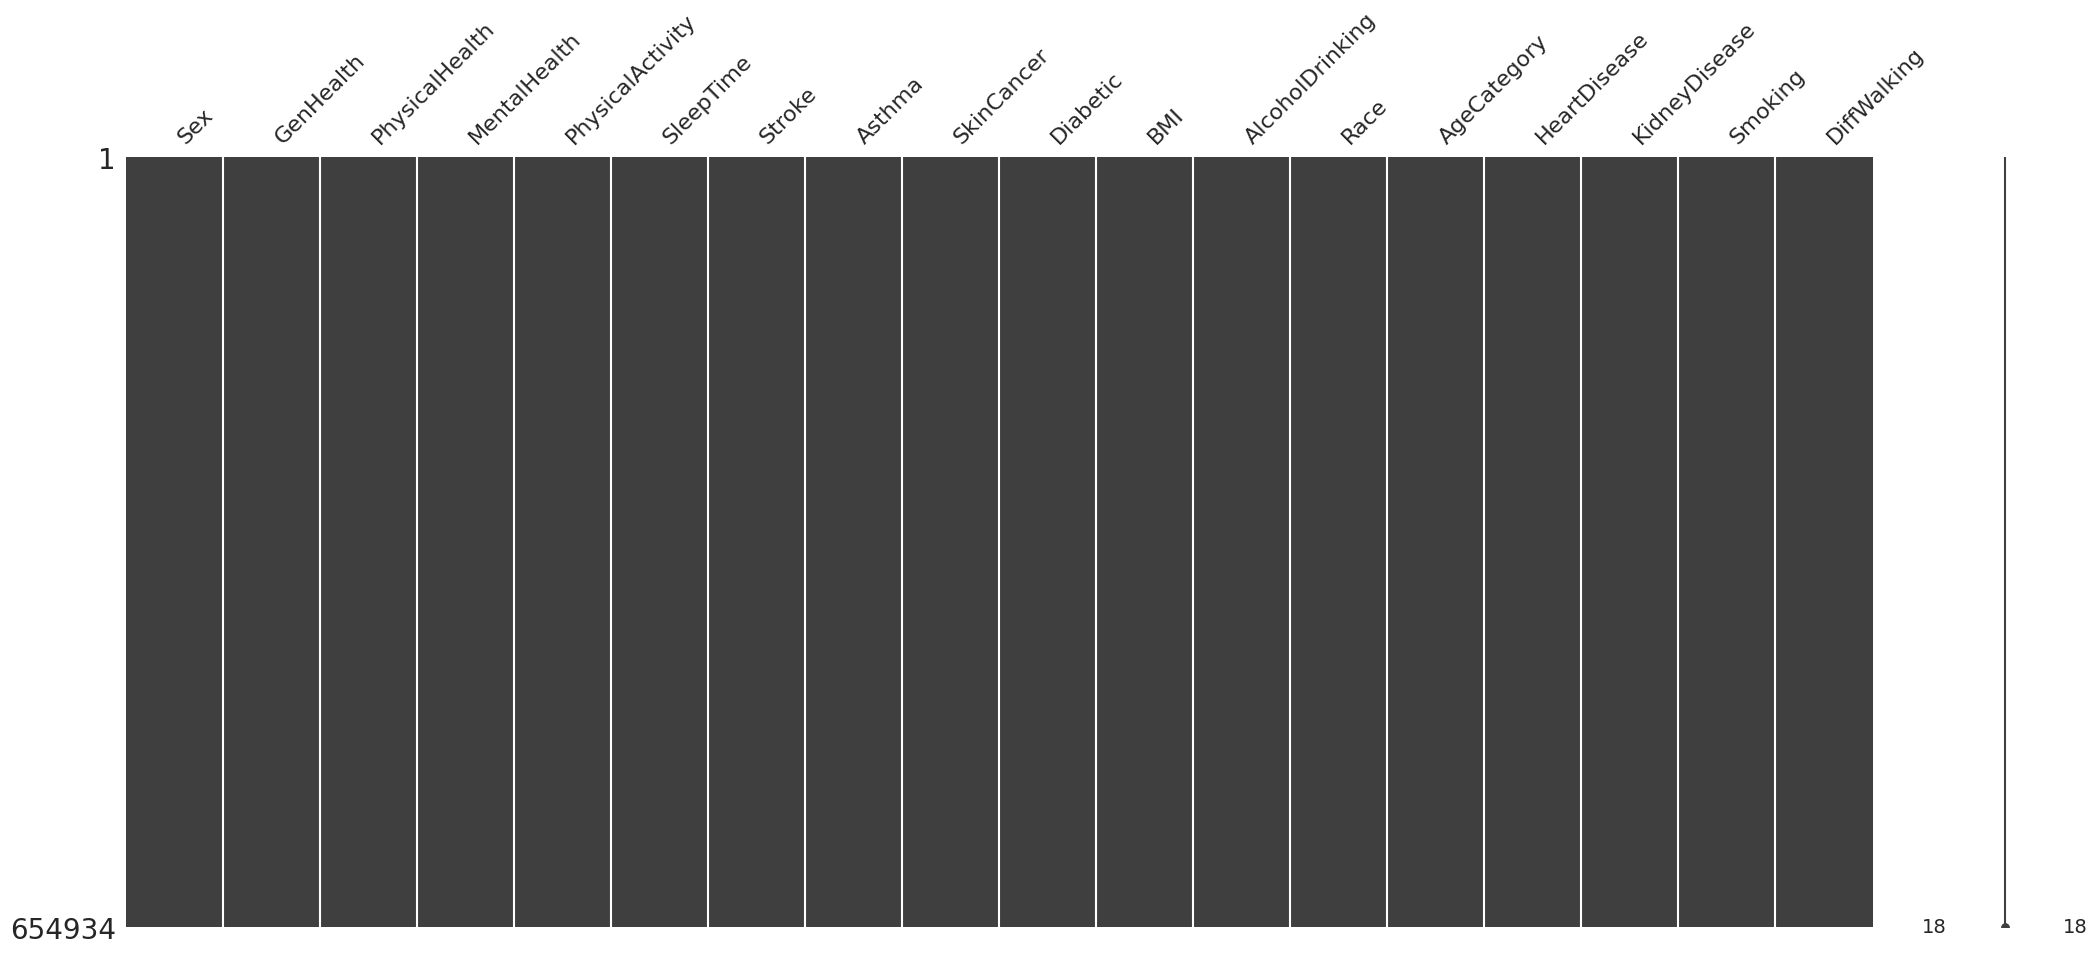

In [11]:
#viz missing
msno.matrix(df)
plt.show()

In [12]:
#check duplicate
df.duplicated().any()

True

In [13]:
df = df.drop_duplicates()
df.duplicated().any()

False

In [14]:
unique_values = df['Race'].value_counts()
print(unique_values)

Race
White only, Non-Hispanic          243997
White                             227724
Hispanic                           58222
Black only, Non-Hispanic           25385
Black                              22810
Other race only, Non-Hispanic      16903
Other                              10891
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: count, dtype: int64


In [15]:
# Define the mapping for renaming
mapping = {'White only, Non-Hispanic': 'White', 'Black only, Non-Hispanic': 'Black','Other race only, Non-Hispanic':'Other'}

# Replace values in the 'Race' column
df['Race'] = df['Race'].replace(mapping)

In [16]:
unique_values = df['Race'].value_counts()
print(unique_values)

Race
White                             471721
Hispanic                           58222
Black                              48195
Other                              27794
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: count, dtype: int64


In [17]:
unique_values = df['AgeCategory'].value_counts()
print(unique_values)

AgeCategory
Age 65 to 69       35076
Age 60 to 64       32956
Age 70 to 74       32543
65-69              31670
60-64              31219
70-74              29273
55-59              27610
Age 55 to 59       27470
Age 80 or older    25436
Age 50 to 54       25187
Age 75 to 79       24171
50-54              23736
80 or older        23352
Age 40 to 44       22619
Age 45 to 49       21452
Age 35 to 39       21418
75-79              20713
Age 18 to 24       20708
45-49              20518
18-24              19998
40-44              19837
35-39              19526
Age 30 to 34       19187
30-34              17953
Age 25 to 29       16779
25-29              16312
Name: count, dtype: int64


In [18]:
# Replace 'to' with '-' in 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].str.replace(' to ', '-')

# Verify the changes
print(df['AgeCategory'].value_counts())

AgeCategory
Age 65-69          35076
Age 60-64          32956
Age 70-74          32543
65-69              31670
60-64              31219
70-74              29273
55-59              27610
Age 55-59          27470
Age 80 or older    25436
Age 50-54          25187
Age 75-79          24171
50-54              23736
80 or older        23352
Age 40-44          22619
Age 45-49          21452
Age 35-39          21418
75-79              20713
Age 18-24          20708
45-49              20518
18-24              19998
40-44              19837
35-39              19526
Age 30-34          19187
30-34              17953
Age 25-29          16779
25-29              16312
Name: count, dtype: int64


In [19]:
# Remove prefix 'Age' from 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].str.replace('Age ', '')

In [20]:
df.describe(include='object')

Sex  GenHealth PhysicalActivity  Stroke  Asthma SkinCancer  \
count   626719     626719           626719  626719  626719     626719   
unique       2          5                2       2       2          2   
top     Female  Very good              Yes      No      No         No   
freq    327512     216345           479969  600775  533883     569844   

       Diabetic AlcoholDrinking    Race AgeCategory HeartDisease  \
count    626719          626719  626719      626719       626719   
unique        6               2       7          13            2   
top          No              No   White       65-69           No   
freq     521320          428773  471721       66746       580929   

       KidneyDisease       Smoking DiffWalking  
count         626719        626719      626719  
unique             2             6           2  
top               No  Never smoked          No  
freq          599870        193470      532388

In [21]:
# Define replacements
replacements = {
    'Yes, but only during pregnancy (female)': 'Yes (during pregnancy)',
    'No, pre-diabetes or borderline diabetes': 'No, borderline diabetes'
}

# Replace specified values in the 'Diabetic' column
df['Diabetic'].replace(replacements, inplace=True)

In [22]:
# Iterate over categorical columns, print column name, and display unique values

for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('*'*60 )

Column Name:  Sex
['Female' 'Male']
************************************************************
Column Name:  GenHealth
['Excellent' 'Very good' 'Fair' 'Poor' 'Good']
************************************************************
Column Name:  PhysicalActivity
['No' 'Yes']
************************************************************
Column Name:  Stroke
['No' 'Yes']
************************************************************
Column Name:  Asthma
['No' 'Yes']
************************************************************
Column Name:  SkinCancer
['Yes' 'No']
************************************************************
Column Name:  Diabetic
['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
************************************************************
Column Name:  AlcoholDrinking
['No' 'Yes']
************************************************************
Column Name:  Race
['White' 'Black' 'Other' 'Multiracial, Non-Hispanic' 'Hispanic' 'Asian'
 'American Indian/Alaskan Native']

<a id="2"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Exploratory Data Analysis </h1>
</div>

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42,
                                      stratify=df['HeartDisease'])
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, test.shape)

(501375, 18) (125344, 18)


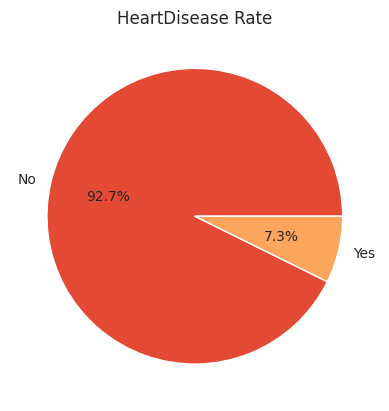

In [24]:
# Plotting the distribution
HeartDisease_rate = train["HeartDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%")
plt.title("HeartDisease Rate")
plt.show();

## HeartDisease in different sex 

In [25]:
gender_count = train['Sex'].value_counts()
gender_count

Sex
Female    261850
Male      239525
Name: count, dtype: int64

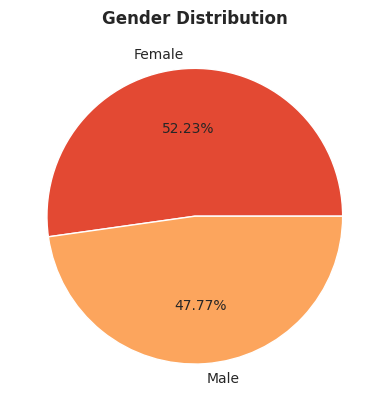

In [26]:
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

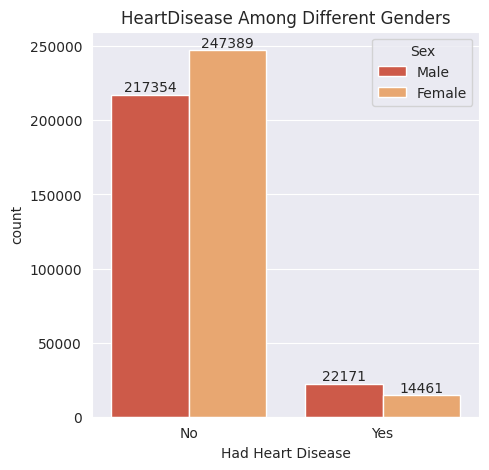

In [27]:
# Set figure size and style
plt.figure(figsize=(5, 5))

# Plot countplot
ax = sns.countplot(data=train, x='HeartDisease', hue='Sex')

# Customize plot
ax.set_title("HeartDisease Among Different Genders", fontsize=12)
ax.set_xlabel("Had Heart Disease", fontsize=10)
ax.set_ylabel("count", fontsize=10)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

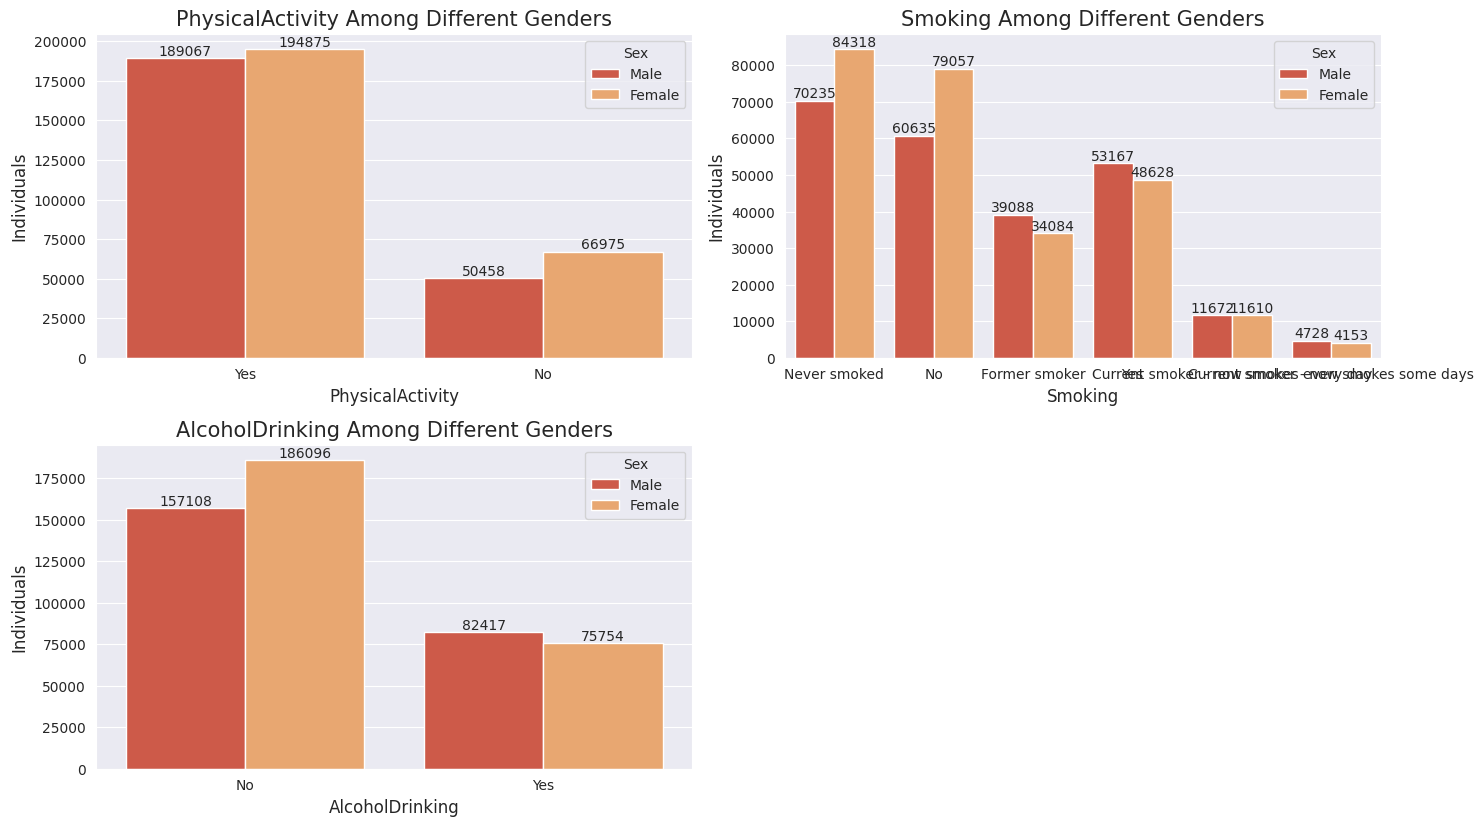

In [28]:
plt.figure(figsize=(15, 12))
risk_factors = ['PhysicalActivity', 'Smoking', 'AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=train, x=risk_factor, hue='Sex')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=15)
    plt.xlabel(risk_factor, fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

## HeartDisease in different age group

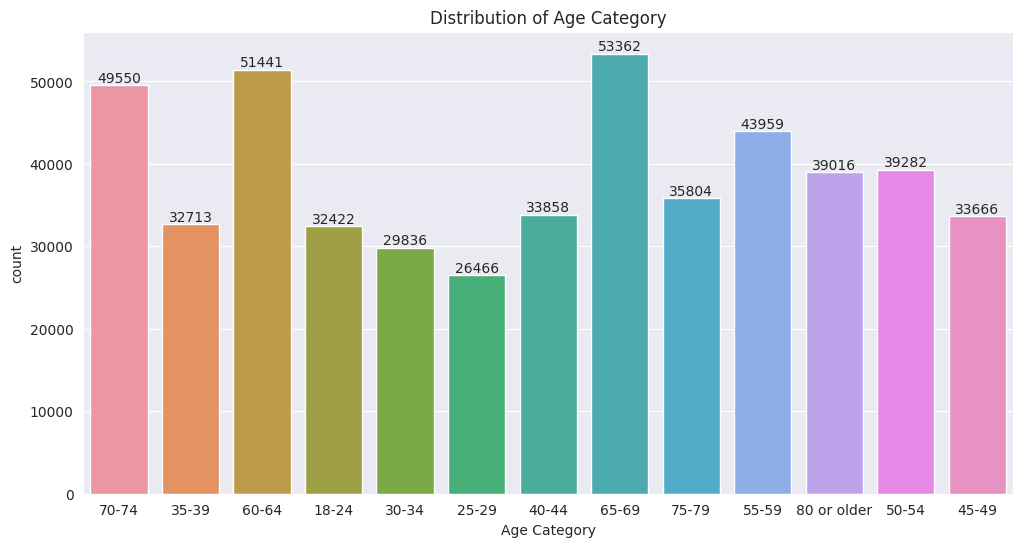

In [29]:
# Remove prefix 'Age' from 'AgeCategory' column
train['AgeCategory'] = train['AgeCategory'].str.replace('Age ', '')

# Set figure size and style
plt.figure(figsize=(12, 6))

# Plot countplot
ax = sns.countplot(data=train, x='AgeCategory')

# Customize plot
ax.set_title('Distribution of Age Category', fontsize=12)
ax.set_xlabel('Age Category', fontsize=10)
ax.set_ylabel('count', fontsize=10)
ax.tick_params(axis='x', rotation=0)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

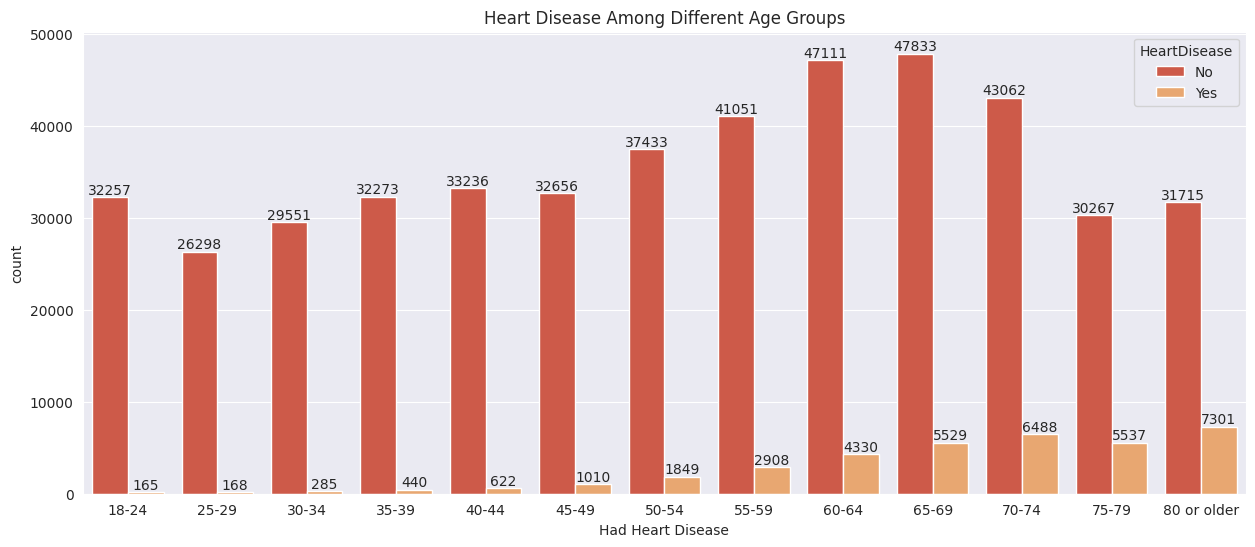

In [30]:
# Set figure size and style
plt.figure(figsize=(15, 6))

# Plot countplot
ax = sns.countplot(data=train, x='AgeCategory', hue='HeartDisease',
                   order = train['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
ax.set_title("Heart Disease Among Different Age Groups", fontsize=12)
ax.set_xlabel("Had Heart Disease", fontsize=10)
ax.set_ylabel("count", fontsize=10)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

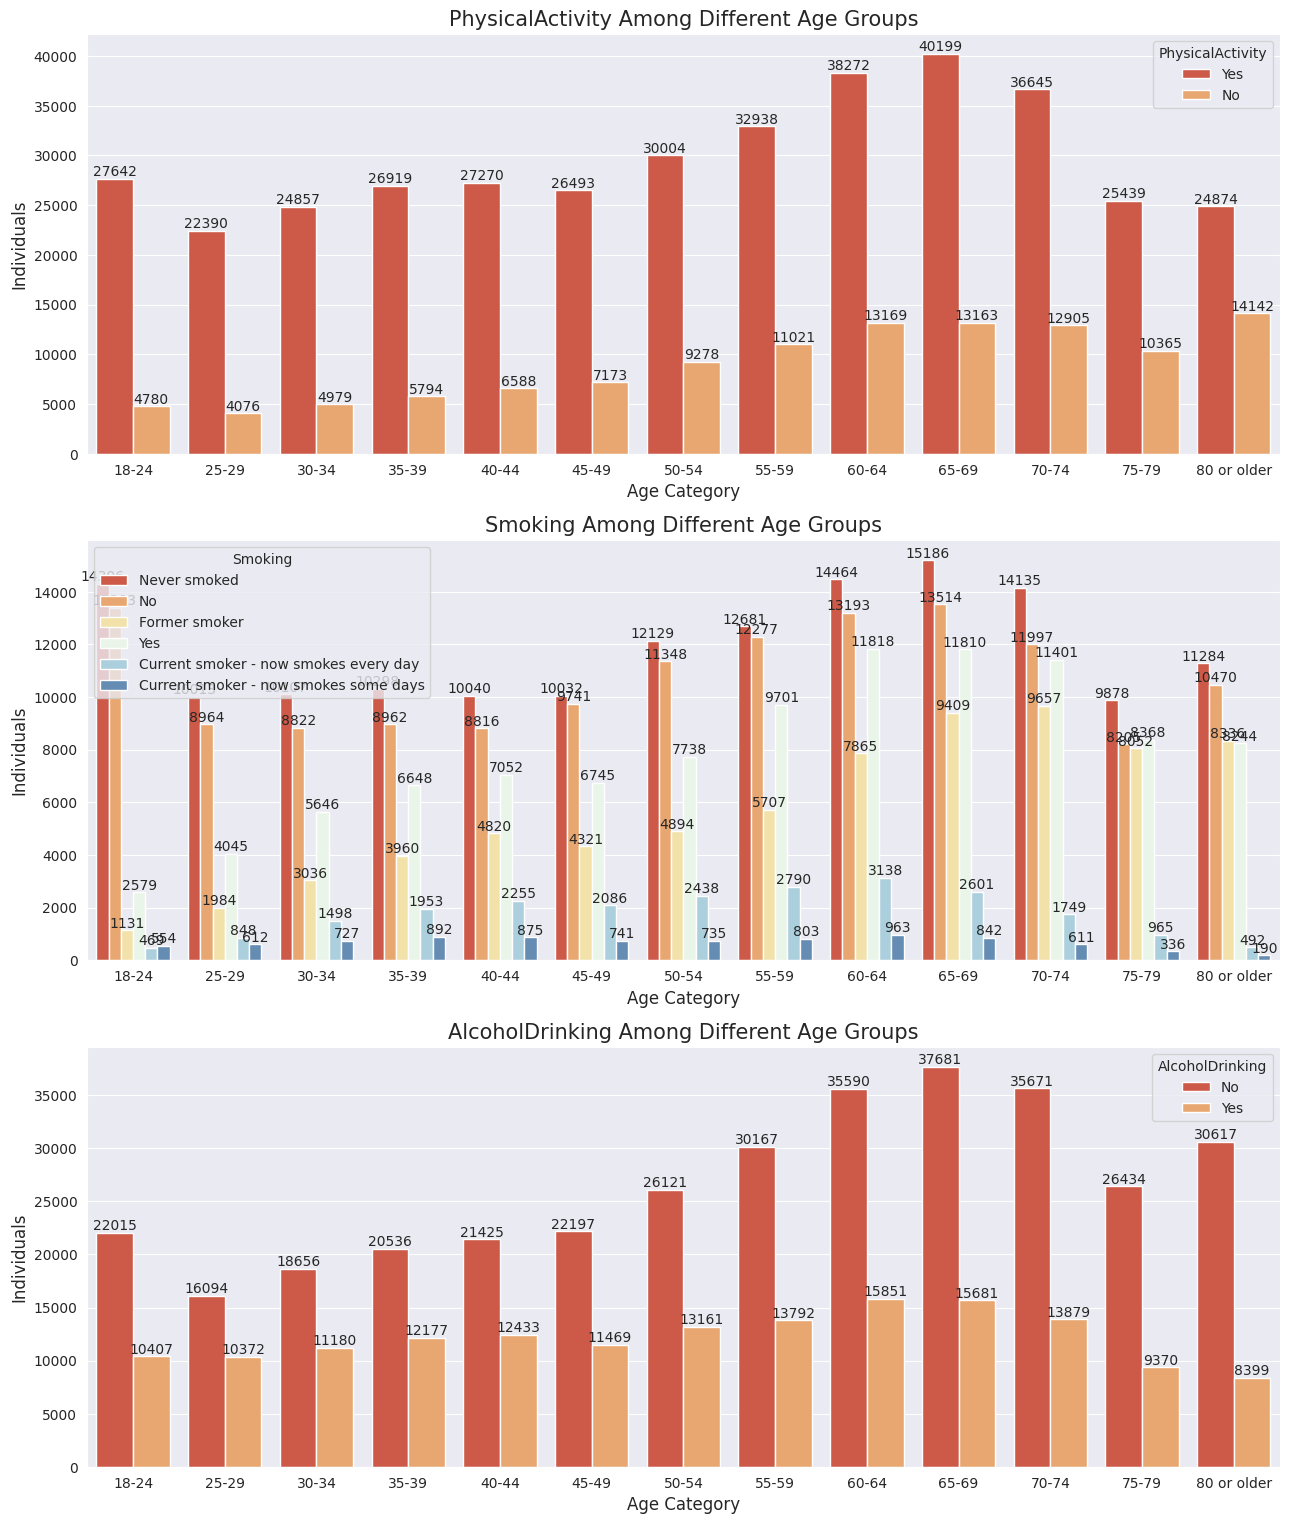

In [31]:
plt.figure(figsize=(13, 25))
risk_factors = ['PhysicalActivity' ,'Smoking','AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    x = sns.countplot(data=train, x='AgeCategory', hue=risk_factor,
                     order = train['AgeCategory'].value_counts().sort_index().index.values)
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=15)
    plt.xlabel("Age Category", fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

### Diabetic

In [32]:
# How Many Individuals in the Dataset are Diabetic¶
train["Diabetic"].value_counts()

Diabetic
No                         417020
Yes                         68498
No, borderline diabetes     11559
Yes (during pregnancy)       4298
Name: count, dtype: int64

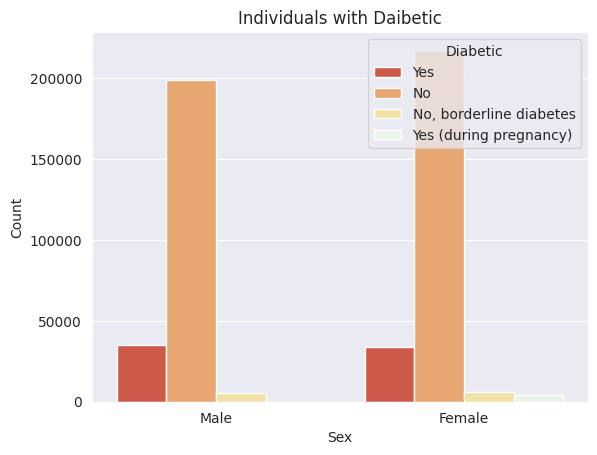

In [33]:
sns.countplot(x = "Sex", hue="Diabetic", data= train)
plt.title("Individuals with Daibetic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show();

### smoke 

In [34]:
train["Smoking"].unique()

array(['Never smoked', 'No', 'Former smoker', 'Yes',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [35]:
# Define replacements
replacements = {
    'Never smoked': 'No',
    'Former smoker': 'No',
    'Current smoker - now smokes some days': 'Yes',
    'Current smoker - now smokes every day': 'Yes'
}

# Replace specified values in the 'Diabetic' column
train['Smoking'].replace(replacements, inplace=True)

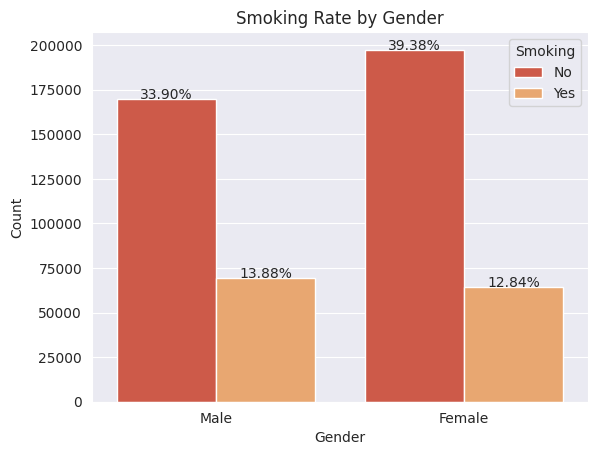

In [36]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=train)

# Add percentages on top of each bar
total = len(train)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

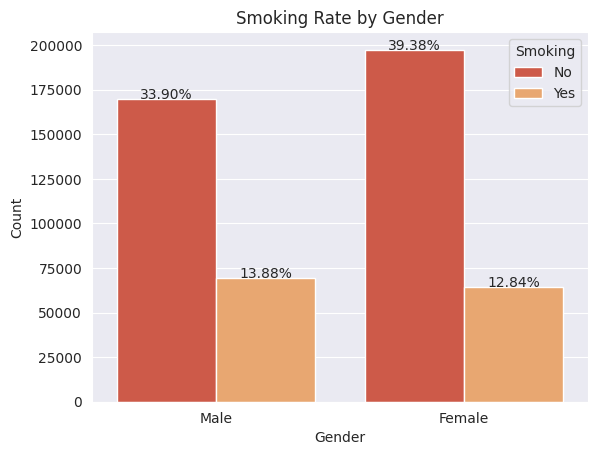

In [37]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=train)

# Add percentages on top of each bar
total = len(train)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Asthma

In [38]:
train["Asthma"].unique()

array(['No', 'Yes'], dtype=object)

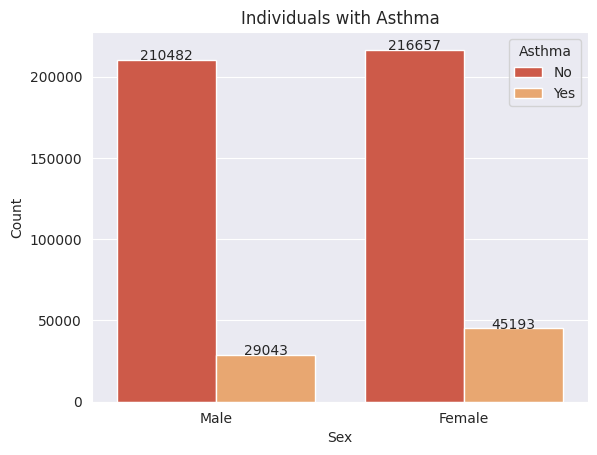

In [39]:
# Create countplot
ax = sns.countplot(x = "Sex", hue="Asthma", data= train)

# Add count values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{int(height)}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Individuals with Asthma')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### KidneyDisease

In [40]:
train['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

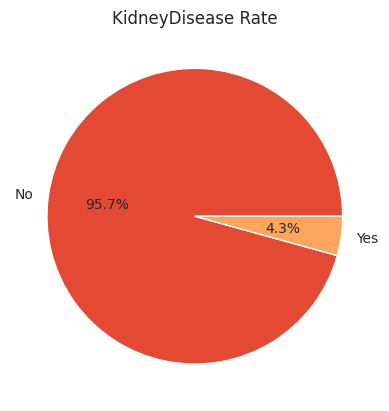

In [41]:
HeartDisease_rate = train["KidneyDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%1.1f%%")
plt.title("KidneyDisease Rate")
plt.show();


### outliers

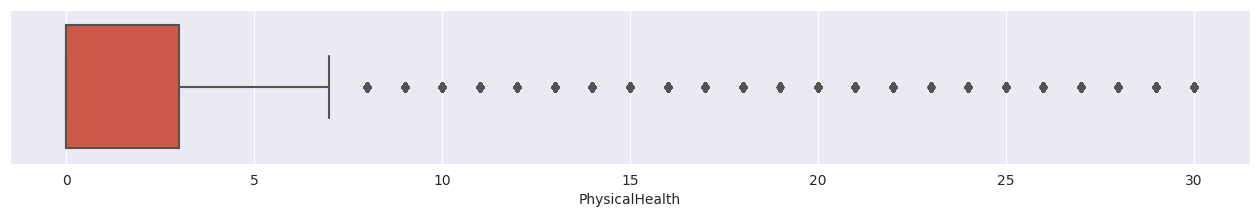

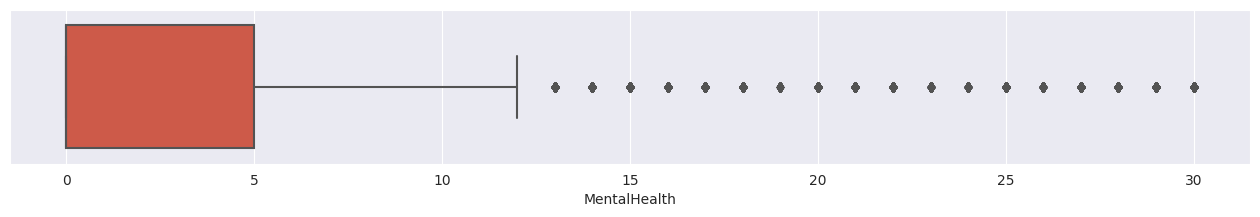

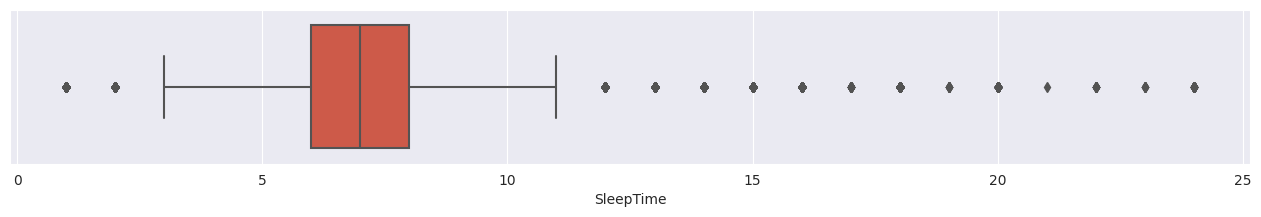

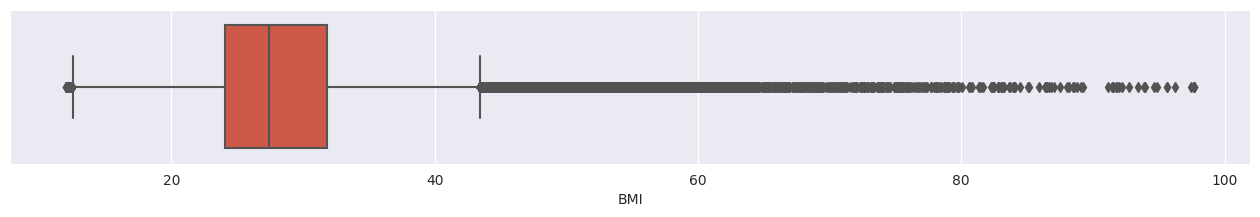

In [42]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=train, x=col)
    plt.show()

In [43]:
def get_outliers(train, column):
    # Calculate quartiles
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Extract outliers
    outliers = train[(train[column] < lower_limit) | (train[column] > upper_limit)]
    
    return outliers, lower_limit, upper_limit


In [44]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(train, 'SleepTime')
print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [45]:
def drop_outliers(dataframe, columns):
    new_df = dataframe.copy()  # Create a copy of the original DataFrame
    for column in columns:
        # Calculate quartiles
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Drop outliers
        dataframe = new_df[(new_df[column] >= lower_limit) & (new_df[column] <= upper_limit)]
    
    return dataframe

In [46]:
# List of columns to check for outliers
columns_to_check = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI',]

# Call the function to drop outliers from specified columns
train = drop_outliers(train, columns_to_check)

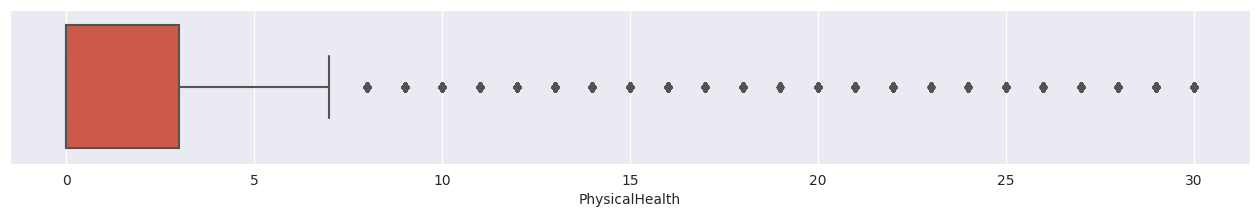

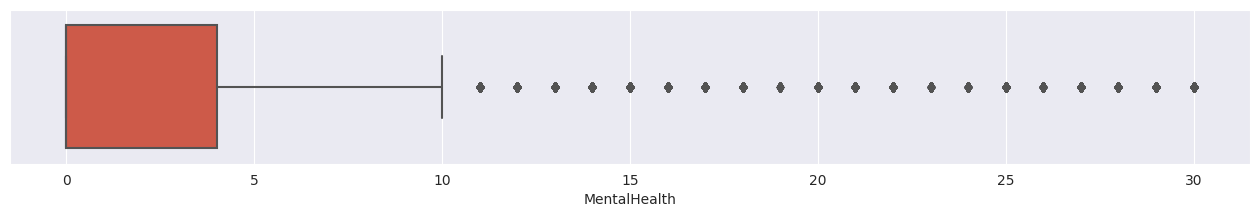

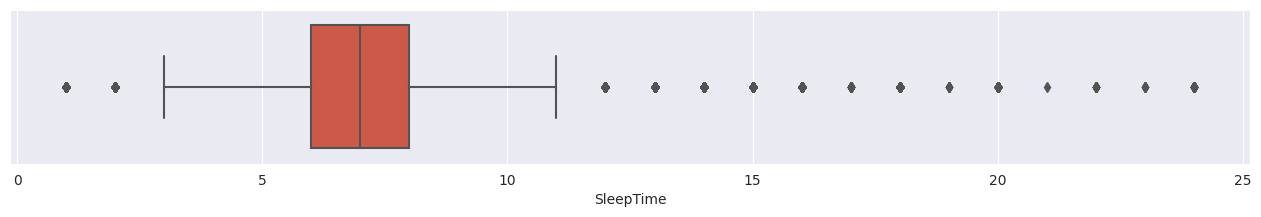

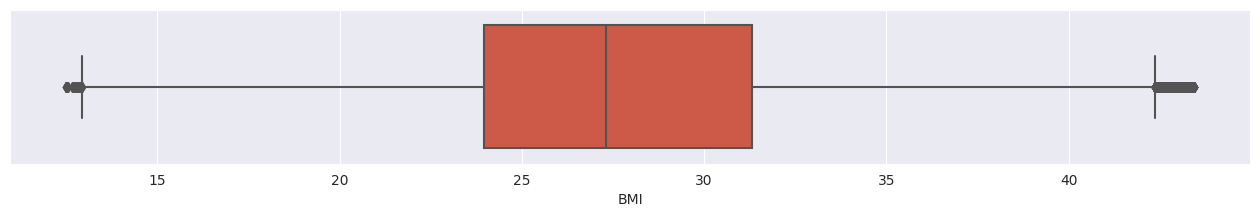

In [47]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=train, x=col)
    plt.show()

### Profiling Generate Report

In [48]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="4"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Preprocessing Pipelines </h1>
</div>

In [49]:
from sklearn.model_selection import train_test_split
temp, test = train_test_split(df, test_size = 0.2, random_state = 42,
                                      stratify=df['HeartDisease'])

train, val = train_test_split(temp, test_size = 0.125, random_state = 42,
                                      stratify=temp['HeartDisease'])

train = train.reset_index(drop = True)
val = val.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, val.shape, test.shape)
print(round((100*train.shape[0]/df.shape[0]), 2),
      round((100*val.shape[0]/df.shape[0]), 2),
      round((100*test.shape[0]/df.shape[0]), 2))

(438703, 18) (62672, 18) (125344, 18)
70.0 10.0 20.0


In [50]:
X_train, y_train = train.drop(columns = 'HeartDisease'), train['HeartDisease']
X_val, y_val = val.drop(columns = 'HeartDisease'), val['HeartDisease']
X_test, y_test = test.drop(columns = 'HeartDisease'), test['HeartDisease']

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(438703, 17) (438703,)
(62672, 17) (62672,)
(125344, 17) (125344,)


In [51]:
num_attris = X_train.select_dtypes(np.number).columns
cat_attris = X_train.select_dtypes(object).columns

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, random_state = 42):
        self.random_state = random_state
        
    def fit(self, X, y = None):
        self.encoding = { 
            'Sex' : dict(zip(['Female', 'Male'], [0, 1])),
            'GenHealth' : dict(zip(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], range(5))),
            'PhysicalActivity' : dict(zip(['No', 'Yes'], [0, 1])),
            'Stroke' : dict(zip(['No', 'Yes'], [0, 1])),
            'Asthma' :  dict(zip(['No', 'Yes'], [0, 1])),
            'SkinCancer' :  dict(zip(['No', 'Yes'], [0, 1])),
            'Diabetic' : dict(zip(['No',  'No, borderline diabetes', 'Yes (during pregnancy)','Yes'], range(4))),
            'AlcoholDrinking' : dict(zip(['No', 'Yes'], [0, 1])),
            'AgeCategory' : dict(zip(['18-24', '25-29', '30-34', '35-39',
                                        '40-44', '45-49', '50-54', '55-59',
                                        '60-64', '65-69', '70-74', '75-79',
                                        '80 or older'], range(14))),

            'KidneyDisease' : dict(zip(['No', 'Yes'], [0, 1])),
            'Smoking' : dict(zip(['Never smoked', 'No', 'Former smoker', 'Yes',
                                  'Current smoker - now smokes every day',
                                  'Current smoker - now smokes some days'], range(10))),

            'DiffWalking' :  dict(zip(['No', 'Yes'], [0, 1])),
                   }
        self.feature_names = X.columns
        
        return self
    
    def transform(self, X):
        X_ = X.copy()
        for col in self.encoding.keys():
            X_[col] = X_[col].map(self.encoding[col])
            X_[col] = X_[col].astype('int')
        return X_
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
encoder = OrdinalEncoder()
encoder.fit_transform(X_train[cat_attris]).head()

Sex  GenHealth  PhysicalActivity  Stroke  Asthma  SkinCancer  Diabetic  \
0    0          2                 1       0       0           1         0   
1    0          3                 1       0       0           0         0   
2    1          1                 0       1       0           1         0   
3    0          2                 1       0       0           0         3   
4    1          2                 1       0       0           0         0   

   AlcoholDrinking      Race  AgeCategory  KidneyDisease  Smoking  DiffWalking  
0                1     White           10              0        2            0  
1                0     White            4              0        1            0  
2                0     White           11              0        2            1  
3                0     White           12              1        2            1  
4                0  Hispanic            0              0        0            0

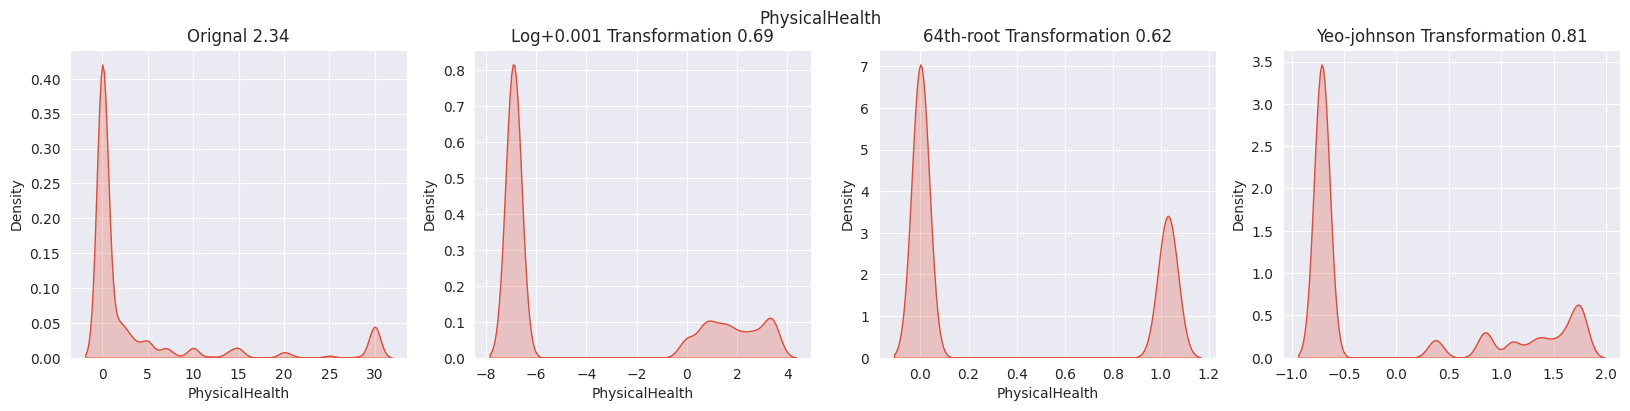

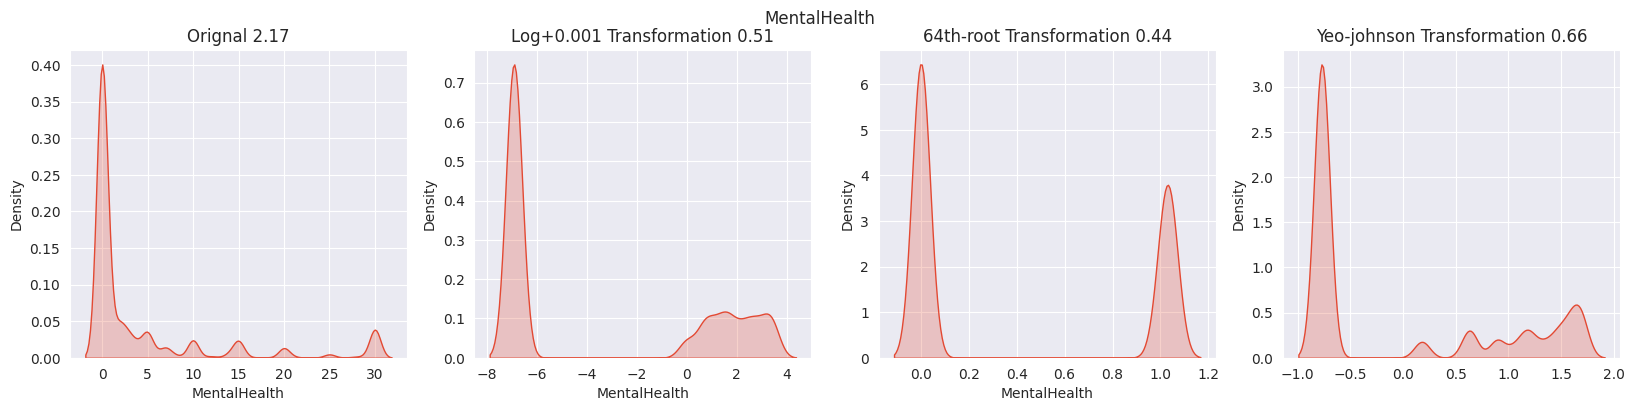

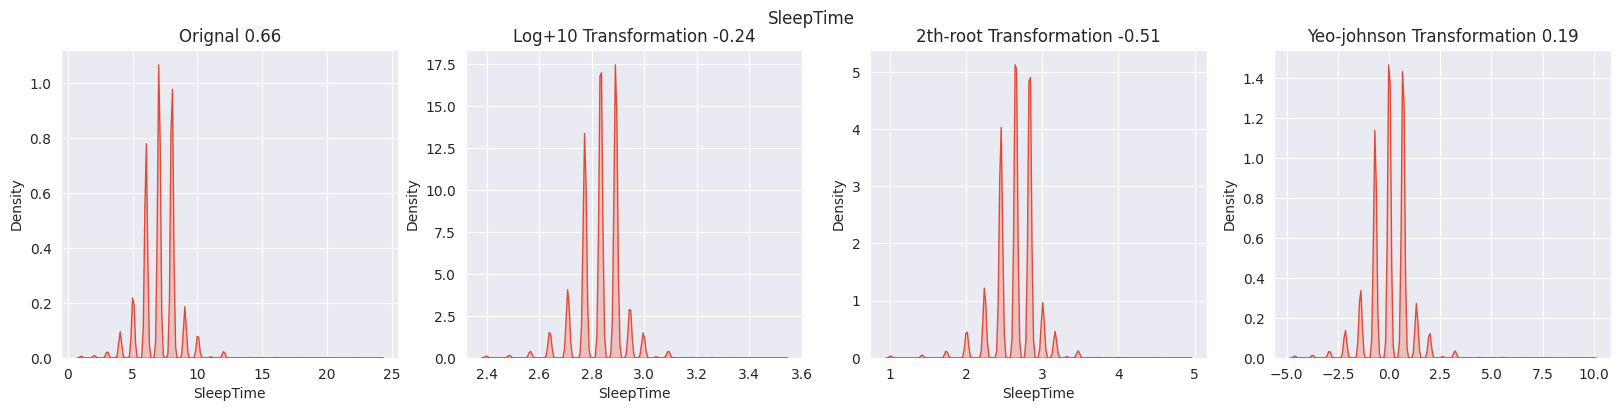

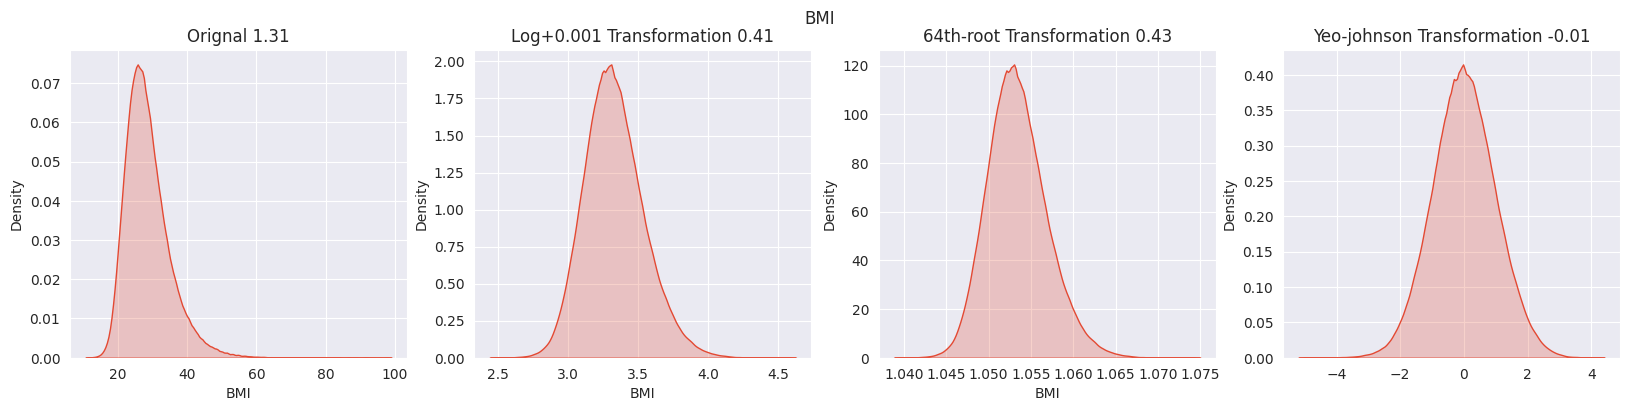

In [53]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

for attr in num_attris:
    fig, ax = plt.subplots(1, 4, figsize=(20,4))

    skf = X_train[attr].skew().round(2)
    sns.kdeplot(X_train[attr], fill = True, ax=ax[0])
    ax[0].set_title(f'Orignal {skf}')

    
    gridsv, x, skf = [0.001, 1, 10, 100, 1000, 10000], 0.001, 200
    for i in gridsv:
        n_skf = skew(np.log(i+X_train[attr]))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf    
            
    log_bmi = np.log(x+X_train[attr])
    skf = skew(log_bmi).round(2)
    sns.kdeplot(log_bmi, fill = True, ax=ax[1])
    ax[1].set_title(f'Log+{x} Transformation {skf}')


    gridsv, x, skf = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64], 1/2, 200
    for i in gridsv:
        n_skf = skew(np.power(X_train[attr], i))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf  

    sqrt_bmi = np.power(X_train[attr], x)
    sns.kdeplot(sqrt_bmi, fill = True, ax=ax[2])
    skf = skew(sqrt_bmi).round(2)
    ax[2].set_title(f'{int(1/x)}th-root Transformation {skf}')

    transformer = PowerTransformer()
    yeo_bmi = transformer.fit_transform((X_train[[attr]]+1))[:,  0]
    skf = skew(yeo_bmi).round(2)
    sns.kdeplot(yeo_bmi, fill = True, ax=ax[3])
    ax[3].set_title(f'Yeo-johnson Transformation {skf}')

    plt.suptitle(attr)
    plt.show()

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ['SleepTime', 'BMI']
num_pipeline0 = Pipeline([
    ('transform', PowerTransformer()),
    ('scale',StandardScaler()) ])
num_pipeline0

Pipeline(steps=[('transform', PowerTransformer()), ('scale', StandardScaler())])

In [55]:
class NRootTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n = 1/2, random_state = 42):
        self.random_state = random_state
        self.n = n
        
    def fit(self, X, y = None):
        self.feature_names = X.columns
        return self
    
    def transform(self, X):
        return np.power(X, self.n)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
transformer = NRootTransformer(n = 1/32)
transformer.fit_transform(X_train[['PhysicalHealth', 'MentalHealth']]).head()

PhysicalHealth  MentalHealth
0        1.062697           0.0
1        0.000000           0.0
2        0.000000           0.0
3        1.034928           0.0
4        0.000000           0.0

In [56]:
# ['PhysicalHealth', 'MentalHealth']
num_pipeline1 = Pipeline([
    ('transform', NRootTransformer(n = 1/32)),
    ('scale',StandardScaler()) ])
num_pipeline1


Pipeline(steps=[('transform', NRootTransformer(n=0.03125)),
                ('scale', StandardScaler())])

In [57]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder


ord_cat_attris = ['Sex', 'GenHealth', 'PhysicalActivity', 'Stroke', 'Asthma',
               'SkinCancer', 'Diabetic', 'AlcoholDrinking', 'AgeCategory',
               'KidneyDisease', 'Smoking', 'DiffWalking']

preprocessing_pipeline = ColumnTransformer([
    ('num_pipeline0', num_pipeline0, ['BMI', 'SleepTime']),
    ('num_pipeline1', num_pipeline1, ['PhysicalHealth', 'MentalHealth']),
    ('ord_pipeline', OrdinalEncoder(), ord_cat_attris),
    ('onehot_pipeline', OneHotEncoder(), ['Race']),
                                ],
    remainder = "drop")

preprocessing_pipeline

ColumnTransformer(transformers=[('num_pipeline0',
                                 Pipeline(steps=[('transform',
                                                  PowerTransformer()),
                                                 ('scale', StandardScaler())]),
                                 ['BMI', 'SleepTime']),
                                ('num_pipeline1',
                                 Pipeline(steps=[('transform',
                                                  NRootTransformer(n=0.03125)),
                                                 ('scale', StandardScaler())]),
                                 ['PhysicalHealth', 'MentalHealth']),
                                ('ord_pipeline', OrdinalEncoder(),
                                 ['Sex', 'GenHealth', 'PhysicalActivity',
                                  'Stroke', 'Asthma', 'SkinCancer', 'Diabetic',
                                  'AlcoholDrinking', 'AgeCategory',
                                  'KidneyDisease', 'Smoking', 'DiffWalking']),
                                ('onehot_pipeline', OneHotEncoder(), ['Race'])])

In [58]:
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_val_processed = preprocessing_pipeline.transform(X_val)
X_test_processed = preprocessing_pipeline.transform(X_test)

print(X_train_processed.shape)
X_train_processed[0]

(438703, 23)


array([-1.02297148,  1.31580739,  1.35768189, -0.80527766,  0.        ,
        2.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        , 10.        ,  0.        ,  2.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ])

In [59]:
y_train = y_train.replace({'Yes': 1, 'No' : 0})
y_test = y_test.replace({'Yes': 1, 'No' : 0})
y_val = y_val.replace({'Yes': 1, 'No' : 0})

y_train.shape, y_test.shape, y_val.shape

((438703,), (125344,), (62672,))

<a id="5"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Sampling </h1>
</div>

### Firstly, setting a baseline model performance.

In [60]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression(max_iter=10000)
clr.fit(X_train_processed, y_train)

LogisticRegression(max_iter=10000)

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score


y_val_hat = clr.predict(X_val_processed)

under_sampling_scores = dict()
under_sampling_scores['LogisticRegressionBL'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }
print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

f1 score: 0.1293284867036541
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.52      0.07      0.13      4579

    accuracy                           0.93     62672
   macro avg       0.73      0.53      0.55     62672
weighted avg       0.90      0.93      0.90     62672



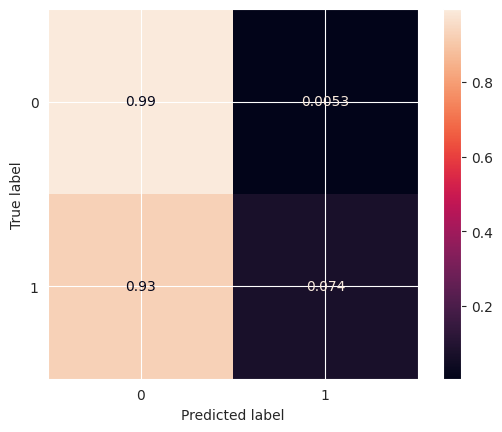

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_val_hat, normalize='true', cmap='rocket')
plt.grid('off')
plt.show()

### Under-sampling techniques
- Generating techniques
    - Cluster-Centroids
- Selection techniques Controled
    - Random-Under-Sampling
    - Near-Miss
- Selection techniques Cleaning
    - Tomek-Links
    - OneSidedSelection
    - EditedNearestNeighbours
    - RepeatedEditedNearestNeighbours
    - AllKNN
    - InstanceHardnessThreshold
    - NeighbourhoodCleaningRule
- Comibing best selection and cleaning techniques

### RandomUnderSampler

In [63]:
def plot_sampled_vs_notsampled(y_train, y_train_sampled, title):
    print(f'instances number before sampling: {y_train.shape[0]}')
    print(f"instances number after sampling: {y_train_sampled.shape[0]}")

    print(f"minority class percentage before sampling: {round(y_train.sum()/len(y_train), 3)}")
    print(f"minority class percentage after sampling: {y_train_sampled.sum()/len(y_train_sampled)}")
    
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    HeartDisease_rate = y_train.map({0:'No', 1:'Yes'}).value_counts()
    ax[0].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[0].set_title('original')
    HeartDisease_rate = y_train_sampled.map({0:'No', 1:'Yes'}).value_counts()
    ax[1].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[1].set_title('under-sampled')
    plt.suptitle(title)
    plt.show();

instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


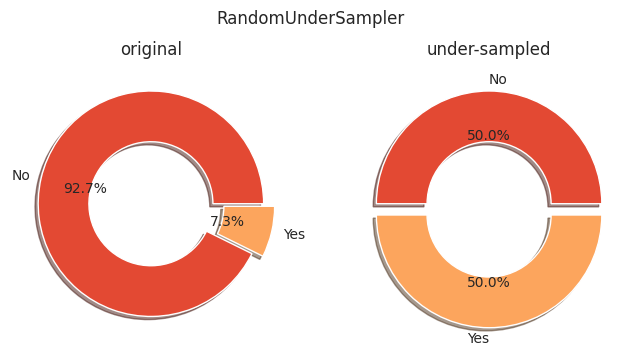

In [64]:
from imblearn.under_sampling import RandomUnderSampler

sampler  = RandomUnderSampler(sampling_strategy='majority')
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandomUnderSampler')

In [65]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandomUnderSampler'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3093395252837977
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.79      0.31      4579

    accuracy                           0.74     62672
   macro avg       0.59      0.76      0.58     62672
weighted avg       0.92      0.74      0.80     62672



### ClusterCentroids

***ClusterCentroids Model takes too long to run so I resampled the dataset in batches***

In [100]:
n = 20
batch_size = len(X_train_processed) // n
remainder = len(X_train_processed) % n
X_batches = []
y_batches = []
idx, s = 0, 0
for i in range(n):
    batch_end = idx + batch_size + (1 if i < remainder else 0)
    X_batches.append(X_train_processed[idx:batch_end])
    y_batches.append(y_train[idx:batch_end])
    idx = batch_end
    s += X_batches[i].shape[0]
    assert X_batches[i].shape[0] == y_batches[i].shape[0]
    
assert X_train_processed.shape[0] == s
print(X_train_processed.shape[0], s, X_batches[0].shape )

438703 438703 (21936, 23)


0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


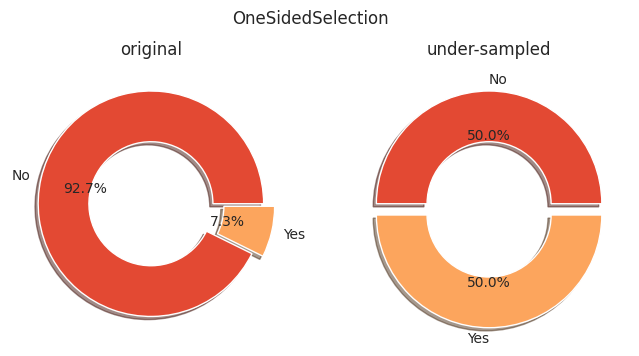

In [70]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = ClusterCentroids(sampling_strategy='majority', random_state = 42,
                           estimator = MiniBatchKMeans(n_init = 1, random_state=42))
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'OneSidedSelection')

In [71]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['ClusterCentroids'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.30571781861595526
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.78      0.31      4579

    accuracy                           0.74     62672
   macro avg       0.58      0.76      0.57     62672
weighted avg       0.92      0.74      0.80     62672



### NearMiss

instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


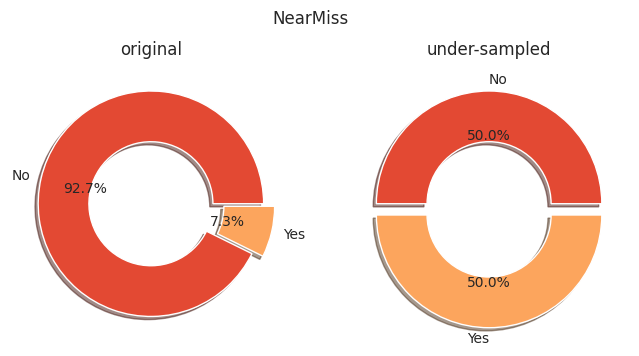

In [72]:
from imblearn.under_sampling import NearMiss

sampler = NearMiss(sampling_strategy='majority', n_neighbors=3)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NearMiss')

In [73]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NearMiss'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.1652892561983471
              precision    recall  f1-score   support

           0       0.96      0.39      0.55     58093
           1       0.09      0.79      0.17      4579

    accuracy                           0.42     62672
   macro avg       0.53      0.59      0.36     62672
weighted avg       0.90      0.42      0.53     62672



### OneSidedSelection

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 428811
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0747485488945013


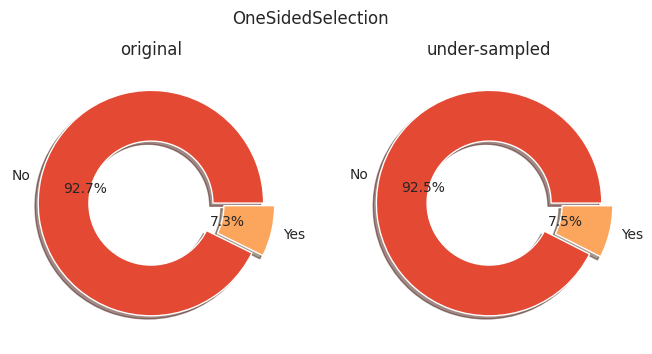

In [74]:
from imblearn.under_sampling import OneSidedSelection

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = OneSidedSelection(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'OneSidedSelection')

In [75]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['OneSidedSelection'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.1529346417330124
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.50      0.09      0.15      4579

    accuracy                           0.93     62672
   macro avg       0.72      0.54      0.56     62672
weighted avg       0.90      0.93      0.90     62672



### EditedNearestNeighbours

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 377175
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0849817723868231


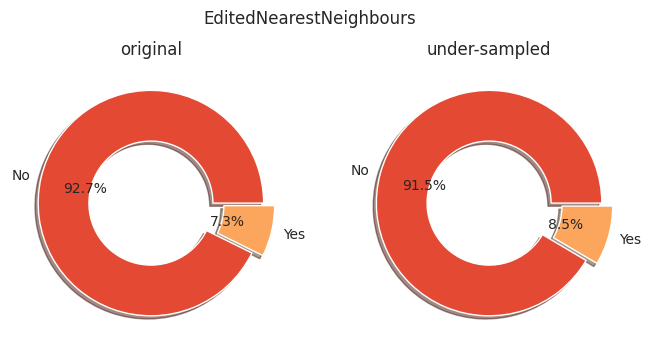

In [76]:
from imblearn.under_sampling import EditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'EditedNearestNeighbours')

In [77]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['EditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.29371196754563894
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     58093
           1       0.39      0.24      0.29      4579

    accuracy                           0.92     62672
   macro avg       0.66      0.60      0.62     62672
weighted avg       0.90      0.92      0.91     62672



### RepeatedEditedNearestNeighbours

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 349952
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.09159256126554499


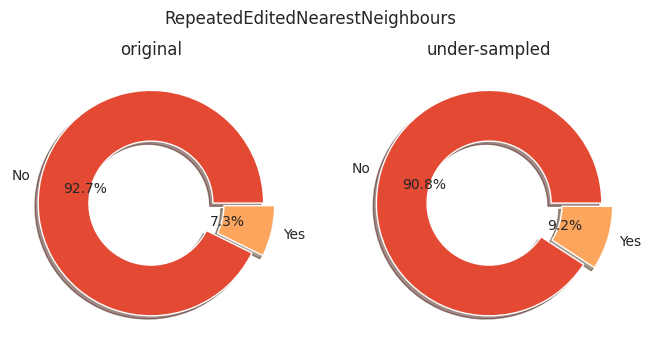

In [88]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)

X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RepeatedEditedNearestNeighbours')

In [89]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RepeatedEditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3565998617829993
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     58093
           1       0.33      0.39      0.36      4579

    accuracy                           0.90     62672
   macro avg       0.64      0.66      0.65     62672
weighted avg       0.91      0.90      0.90     62672



### TomekLinks

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 428811
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0747485488945013


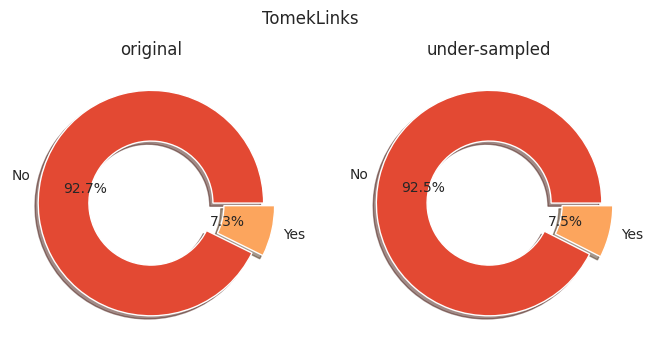

In [90]:
from imblearn.under_sampling import TomekLinks

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = TomekLinks(sampling_strategy='majority')
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'TomekLinks')

In [91]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['TomekLinks'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.15259259259259259
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.50      0.09      0.15      4579

    accuracy                           0.93     62672
   macro avg       0.72      0.54      0.56     62672
weighted avg       0.90      0.93      0.90     62672



### ALLKNN

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 364224
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08800353628536285


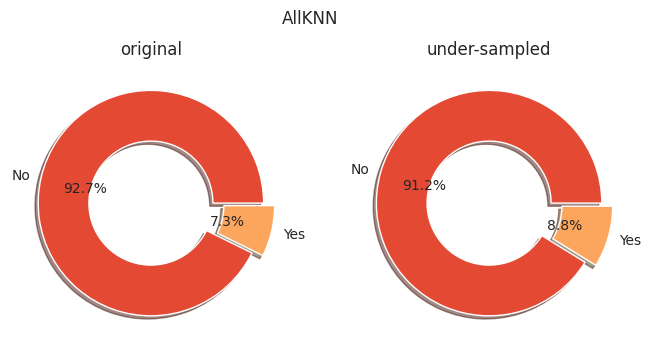

In [92]:
from imblearn.under_sampling import AllKNN

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = AllKNN(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'AllKNN')

In [93]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['AllKNN'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.32887732166094874
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     58093
           1       0.36      0.30      0.33      4579

    accuracy                           0.91     62672
   macro avg       0.65      0.63      0.64     62672
weighted avg       0.90      0.91      0.91     62672



### InstanceHardnessThreshold

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 152258
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.21051767394816692


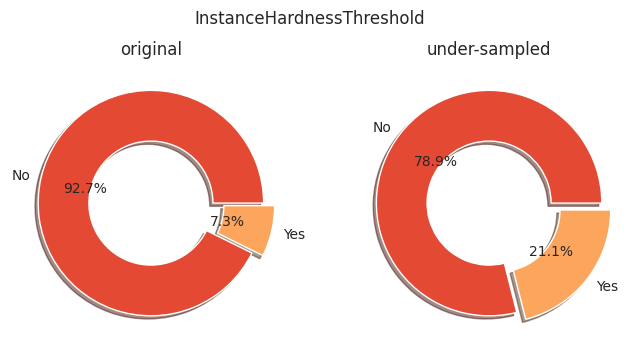

In [84]:
from imblearn.under_sampling import InstanceHardnessThreshold

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = InstanceHardnessThreshold(sampling_strategy='majority', cv=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'InstanceHardnessThreshold')

In [85]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['InstanceHardnessThreshold'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.2722444924110049
              precision    recall  f1-score   support

           0       0.98      0.64      0.78     58093
           1       0.16      0.87      0.27      4579

    accuracy                           0.66     62672
   macro avg       0.57      0.76      0.53     62672
weighted avg       0.92      0.66      0.74     62672



### NeighbourhoodCleaningRule

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 381274
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08406815046397079


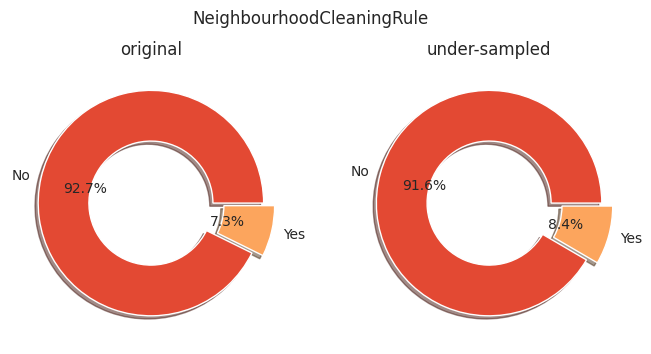

In [94]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = NeighbourhoodCleaningRule(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NeighbourhoodCleaningRule')

In [95]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NeighbourhoodCleaningRule'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.2563715879957774
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     58093
           1       0.41      0.19      0.26      4579

    accuracy                           0.92     62672
   macro avg       0.68      0.58      0.61     62672
weighted avg       0.90      0.92      0.91     62672



### Combining Best Selecting and Cleaning Techniques

In [116]:

print(y_train_resampled.sum()/y_train_resampled.shape[0])

y_train_resampled.shape[0]

0.3939408836723407


81365

In [ ]:
sampler  = RandomUnderSampler(sampling_strategy=0.65)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_resampled, y_train_resampled)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandomUnderSampler&RepeatedEditedNearestNeighbours')

Turns Out It's not a good idea :'''

In [120]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandomUnderSampler&InstanceHardnessThreshold'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.269587646132717
              precision    recall  f1-score   support

           0       0.99      0.63      0.77     58093
           1       0.16      0.88      0.27      4579

    accuracy                           0.65     62672
   macro avg       0.57      0.76      0.52     62672
weighted avg       0.92      0.65      0.73     62672



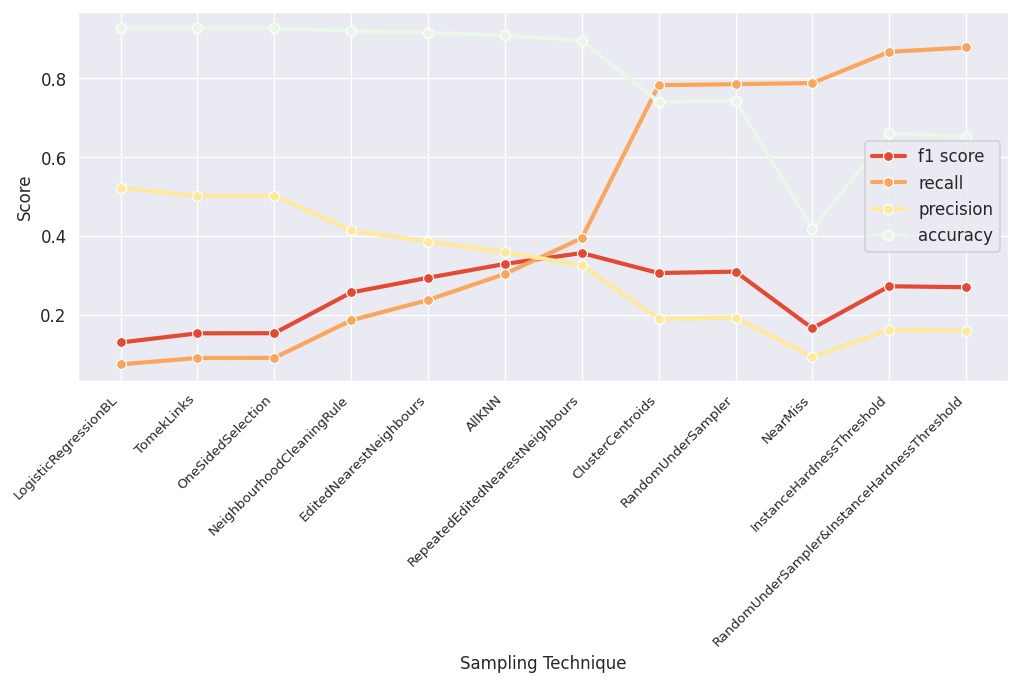

In [123]:
plt.figure(figsize=(10, 4), dpi = 120)
sampling_scores = pd.DataFrame(under_sampling_scores).T.sort_values(by = 'recall')


sns.lineplot(sampling_scores['f1 score'], marker = 'o', linewidth = 2.5, label = 'f1 score')
sns.lineplot(sampling_scores['recall'], marker = 'o', linewidth = 2.5, label = 'recall')
sns.lineplot(sampling_scores['precision'], marker = 'o', linewidth = 2.5, label = 'precision')
sns.lineplot(sampling_scores['accuracy'], marker = 'o', linewidth = 2.5, label = 'accuracy')

plt.xlabel('Sampling Technique')
plt.ylabel('Score')
plt.xticks(size=8,rotation=45, horizontalalignment='right',fontweight='light')
plt.legend()
plt.show()

<a id="6"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Modeling </h1>
</div>

<a id="7"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Hyper-Parameter Tunning </h1>
</div>